In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
pymaceutical_data = pd.merge(clinical_trial_data, mouse_drug_data, on = "Mouse ID", how = "left")

# Display the data table for preview
pymaceutical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
groupedby_drug_timepoint = pymaceutical_data.groupby(["Drug","Timepoint"])

# Convert to DataFrame
drug_timepoint_df = pd.DataFrame(groupedby_drug_timepoint["Tumor Volume (mm3)"].mean().map("{:.2f}".format))
# Preview DataFrame
drug_timepoint_df.head()

Tumor Volume (mm3)
Drug      Timepoint                   
Capomulin 0                      45.00
          5                      44.27
          10                     43.08
          15                     42.06
          20                     40.72

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint


# Convert to DataFrame
drug_timepoint_df["Standard Error"] = groupedby_drug_timepoint["Tumor Volume (mm3)"].sem().map("{:.2f}".format)

# Preview DataFrame
drug_timepoint_df.head()



Tumor Volume (mm3) Standard Error
Drug      Timepoint                                  
Capomulin 0                      45.00           0.00
          5                      44.27           0.45
          10                     43.08           0.70
          15                     42.06           0.84
          20                     40.72           0.91

In [4]:
# Minor Data Munging to Re-Format the Data Frames
ds = {}
for drug in pymaceutical_data["Drug"].unique():
    df = pymaceutical_data[pymaceutical_data["Drug"]==drug]
    new_ds = df.groupby("Timepoint")["Tumor Volume (mm3)"].mean()
    ds[drug] = new_ds

    
New_df = pd.DataFrame(ds)

# Preview that Reformatting worked
New_df

,Capomulin,Ketapril,Naftisol,Infubinol,Stelasyn,Ramicane,Propriva,Zoniferol,Placebo,Ceftamin
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.389175,46.796098,47.062001,47.527452,43.944859,47.248967,46.851818,47.125589,46.503051
10,43.084291,49.582269,48.694210,49.403909,49.463844,42.531957,49.101541,48.689881,49.423329,48.285125
15,42.064317,52.399974,50.933018,51.296397,51.529409,41.495061,51.067318,50.779059,51.359742,50.094055
20,40.716325,54.920935,53.644087,53.197691,54.067395,40.238325,53.346737,53.170334,54.364417,52.157049
25,39.939528,57.678982,56.731968,55.715252,56.166123,38.974300,55.504138,55.432935,57.482574,54.287674
30,38.769339,60.994507,59.559509,58.299397,59.826738,38.703137,58.196374,57.713531,59.809063,56.769517
35,37.816839,63.371686,62.685087,60.742461,62.440699,37.451996,60.350199,60.089372,62.420615,58.827548
40,36.958001,66.068580,65.600754,63.162824,65.356386,36.574081,63.045537,62.916692,65.052675,61.467895


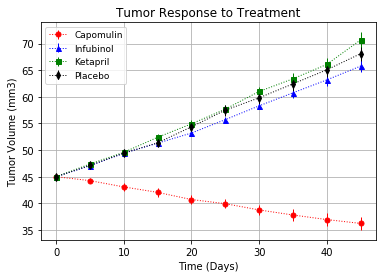

In [5]:
# Generate the Plot (with Error Bars)
drug_list = ["Capomulin","Infubinol", "Ketapril", "Placebo" ]
color_list = ["r","b","g", "k"]
marker_list = ["o","^","s","d"]

for i in range(len(drug_list)):
    yerr = drug_timepoint_df.loc[drug_list[i],"Standard Error"].astype(float)
    #print(yerr)
    plt.errorbar(New_df.index, New_df[drug_list[i]], yerr = yerr,  marker = marker_list[i], 
                color = color_list[i], ls = "dotted", markersize = 5, linewidth = 1)
    
plt.legend(fontsize = 9)
plt.grid()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Save the Figure
plt.savefig("tumor_volume_changes_over_time.png")

# Show figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_timepoint_df["Metastatic Sites"] = groupedby_drug_timepoint["Metastatic Sites"].mean().map("{:.2f}".format)

# Convert to DataFrame

# Preview DataFrame
drug_timepoint_df.head()

Tumor Volume (mm3) Standard Error Metastatic Sites
Drug      Timepoint                                                   
Capomulin 0                      45.00           0.00             0.00
          5                      44.27           0.45             0.16
          10                     43.08           0.70             0.32
          15                     42.06           0.84             0.38
          20                     40.72           0.91             0.65

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
drug_timepoint_df["Standard Error (Met. Sites)"] = groupedby_drug_timepoint["Metastatic Sites"].sem().map("{:.2f}".format)

# Convert to DataFrame

# Preview DataFrame
drug_timepoint_df.head()


Tumor Volume (mm3) Standard Error Metastatic Sites  \
Drug      Timepoint                                                      
Capomulin 0                      45.00           0.00             0.00   
          5                      44.27           0.45             0.16   
          10                     43.08           0.70             0.32   
          15                     42.06           0.84             0.38   
          20                     40.72           0.91             0.65   

                    Standard Error (Met. Sites)  
Drug      Timepoint                              
Capomulin 0                                0.00  
          5                                0.07  
          10                               0.13  
          15                               0.13  
          20                               0.16

In [8]:
# Minor Data Munging to Re-Format the Data Frames
dss = {}
for drug in pymaceutical_data["Drug"].unique():
    df = pymaceutical_data[pymaceutical_data["Drug"]==drug]
    new_ds = df.groupby("Timepoint")["Metastatic Sites"].mean()
    dss[drug] = new_ds

    
New_dff = pd.DataFrame(dss)

# Preview that Reformatting worked
New_dff

,Capomulin,Ketapril,Naftisol,Infubinol,Stelasyn,Ramicane,Propriva,Zoniferol,Placebo,Ceftamin
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.304348,0.260870,0.280000,0.240000,0.120000,0.320000,0.166667,0.375000,0.380952
10,0.320000,0.590909,0.523810,0.666667,0.478261,0.250000,0.565217,0.500000,0.833333,0.600000
15,0.375000,0.842105,0.857143,0.904762,0.782609,0.333333,0.764706,0.809524,1.250000,0.789474
20,0.652174,1.210526,1.150000,1.050000,0.952381,0.347826,1.000000,1.294118,1.526316,1.111111
25,0.818182,1.631579,1.500000,1.277778,1.157895,0.652174,1.357143,1.687500,1.941176,1.500000
30,1.090909,2.055556,2.066667,1.588235,1.388889,0.782609,1.615385,1.933333,2.266667,1.937500
35,1.181818,2.294118,2.266667,1.666667,1.562500,0.952381,2.300000,2.285714,2.642857,2.071429
40,1.380952,2.733333,2.466667,2.100000,1.583333,1.100000,2.777778,2.785714,3.166667,2.357143


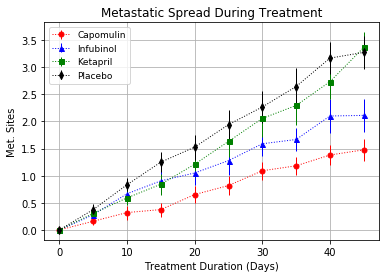

In [9]:
# Generate the Plot (with Error Bars)

for i in range(len(drug_list)):
    yerr = drug_timepoint_df.loc[drug_list[i],"Standard Error (Met. Sites)"].astype(float)
    plt.errorbar(New_dff.index,New_dff[drug_list[i]], yerr = yerr,  marker = marker_list[i], 
                 color = color_list[i], ls = "dotted", markersize = 5, linewidth = 1)
    
plt.legend(fontsize = 9)
plt.grid()
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

#urban = plt.scatter(total_rides_urban_x, average_fare_urban_y, s= total_drivers_urban_z*10, 
 #                   marker = "o", color = "LightCoral", edgecolor = 'black', label = "Urban", alpha = .75, linewidth=1.2)
# Save the Figure
plt.savefig("cancer_spreading_sites_changes_over_time.png")
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
drug_timepoint_df["Count of Mice"] = groupedby_drug_timepoint["Mouse ID"].count()
# Convert to DataFrame

# Preview DataFrame
drug_timepoint_df.head()

Tumor Volume (mm3) Standard Error Metastatic Sites  \
Drug      Timepoint                                                      
Capomulin 0                      45.00           0.00             0.00   
          5                      44.27           0.45             0.16   
          10                     43.08           0.70             0.32   
          15                     42.06           0.84             0.38   
          20                     40.72           0.91             0.65   

                    Standard Error (Met. Sites)  Count of Mice  
Drug      Timepoint                                             
Capomulin 0                                0.00             25  
          5                                0.07             25  
          10                               0.13             25  
          15                               0.13             24  
          20                               0.16             23

In [11]:
# Minor Data Munging to Re-Format the Data Frames
dsss = {}
for drug in pymaceutical_data["Drug"].unique():
    df = pymaceutical_data[pymaceutical_data["Drug"]==drug]
    new_ds = df.groupby("Timepoint")["Mouse ID"].count()
    dsss[drug] = new_ds

    
New_dfff = pd.DataFrame(dsss)
New_dfff
# Preview that Reformatting worked

,Capomulin,Ketapril,Naftisol,Infubinol,Stelasyn,Ramicane,Propriva,Zoniferol,Placebo,Ceftamin
Timepoint,,,,,,,,,,
0,25,25,25,25,26,25,26,25,25,25
5,25,23,23,25,25,25,25,24,24,21
10,25,22,21,21,23,24,23,22,24,20
15,24,19,21,21,23,24,17,21,20,19
20,23,19,20,20,21,23,17,17,19,18
25,22,19,18,18,19,23,14,16,17,18
30,22,18,15,17,18,23,13,15,15,16
35,22,17,15,12,16,21,10,14,14,14
40,21,15,15,10,12,20,9,14,12,14


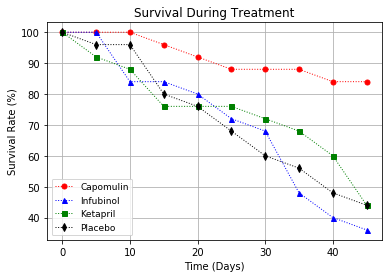

In [12]:
# Generate the Plot (with Error Bars)

for i in range(len(drug_list)):
    plt.errorbar(New_dfff.index,New_dfff[drug_list[i]]*4, marker = marker_list[i], 
                 color = color_list[i], ls = "dotted", markersize = 5, linewidth = 1)
    
plt.legend(fontsize = 9)
plt.grid()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

#urban = plt.scatter(total_rides_urban_x, average_fare_urban_y, s= total_drivers_urban_z*10, 
 #                   marker = "o", color = "LightCoral", edgecolor = 'black', label = "Urban", alpha = .75, linewidth=1.2)
# Save the Figure
plt.savefig("number_of_mice_alive_over_time.png")
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
volume_change = []
for drug in New_df.columns:
    change = ((New_df.loc[45,drug] - New_df.loc[0,drug])/New_df.loc[0,drug])*100
    volume_change.append(change)


# Display the data to confirm
volume_change_df = pd.DataFrame({"Drug":New_df.columns,"Volume Change":volume_change}).set_index("Drug")
volume_change_df

,Volume Change
Drug,
Capomulin,-19.475303
Ketapril,57.028795
Naftisol,53.923347
Infubinol,46.123472
Stelasyn,52.085134
Ramicane,-22.320900
Propriva,47.241175
Zoniferol,46.579751
Placebo,51.297960


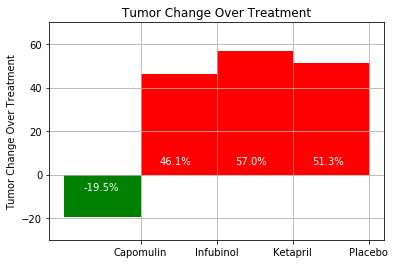

In [14]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 
y_axis = []

for i in drug_list:
    y_axis.append(volume_change_df.loc[i,"Volume Change"]) 

    x_axis = np.arange(4) 
color = ["r" if y_axis[i]>0 else "g" for i in range(len(y_axis))]
plt.bar(x_axis,y_axis, color = color, align = "edge", width = 1)
    
plt.grid()
plt.title("Tumor Change Over Treatment")
plt.ylabel("Tumor Change Over Treatment")
plt.xticks(np.arange(1,5), drug_list)
plt.yticks(np.arange(-20,65,20))
plt.ylim(-30,70)




# Use functions to label the percentages of changes
for i in range(len(drug_list)):
    if y_axis[i]>0:
        y_place = 5
    else:
        y_place = -7
    plt.text(x =i+.25  , y =y_place , s = f"{round(y_axis[i],1)}%", size = 10, color = "w")

# Call functions to implement the function calls


# Save the Figure
plt.savefig("Tumor_change_over_time.png")


# Show the Figure
plt.show()
